Import the Dataset to a Pandas Dataframe. Use thousands=',' parse the numeric data in "120,200" format. Drop Columns which are completely empty.

In [112]:
import pandas as pd

df = pd.read_csv('data.csv', thousands=',')
df.dropna(how='all', axis=1, inplace=True)
df.columns = df.columns.str.replace('\n','')
df

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),...,Leucine (mg),Lysine (mg),Methionine (mg),Phenylalanine (mg),Proline (mg),Serine (mg),Threonine (mg),Tyrosine (mg),Tryptophan (mg),Valine (mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,62.0,58.0,16.0,38.0,32.0,81.0,39.0,28.0,14,53.0
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,52.0,48.0,13.0,31.0,26.0,67.0,33.0,24.0,12,44.0
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,106.0,100.0,27.0,64.0,54.0,138.0,67.0,48.0,25,91.0
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,152.0,142.0,38.0,92.0,77.0,198.0,96.0,69.0,35,130.0


Show Information about the Dataset

In [113]:
import numpy as np
percentage_empty = np.count_nonzero(df.isna()) / df.size
print(f"Percentage of Empty Values {percentage_empty*100}%")

null_percentage = df.isnull().sum() / df.shape[0] * 100

# Below code gives list of columns having more than 10% null
cols_half_empty = null_percentage[null_percentage > 50].keys()
print(f"{len(cols_half_empty)} columns are more than 50% Empty")

cols_almost_full = null_percentage[null_percentage < 1].keys()
print(f"{len(cols_almost_full)} columns are Mostly Full")

print("Emptiness Percentage of All Columns:")
emptiness_analysis = df.isnull().mean() * 100
emptiness_analysis

Percentage of Empty Values 57.00108579631197%
169 columns are more than 50% Empty
63 columns are Mostly Full
Emptiness Percentage of All Columns:


Public Food Key                                 0.000000
Classification                                  0.123762
Food Name                                       0.000000
Energy with dietary fibre, equated (kJ)         0.000000
Energy, without dietary fibre, equated (kJ)     0.000000
                                                 ...    
Serine (mg)                                    88.799505
Threonine (mg)                                 88.799505
Tyrosine (mg)                                  88.799505
Tryptophan (mg)                                 0.000000
Valine (mg)                                    88.799505
Length: 269, dtype: float64

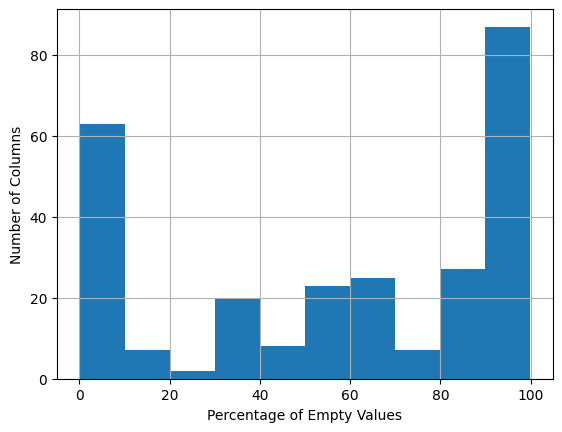

In [114]:
import matplotlib.pyplot as plt

ax = emptiness_analysis.hist()
ax.set_xlabel("Percentage of Empty Values")
ax.set_ylabel("Number of Columns")
plt.show()

### Train test Split

In [115]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),...,Leucine (mg),Lysine (mg),Methionine (mg),Phenylalanine (mg),Proline (mg),Serine (mg),Threonine (mg),Tyrosine (mg),Tryptophan (mg),Valine (mg)
763,F000845,18101.0,"Beef, steak, boneless, round, untrimmed, raw",568,568,69.1,20.4,3.26,6.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN
274,F007164,12601.0,"Porridge, rolled oats, prepared with water",374,351,79.6,3.0,0.51,2.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN
1323,F000339,28303.0,"Bar, muesli, plain or with dried fruit, yoghur...",1675,1621,8.2,6.6,1.06,14.0,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN
1361,F004600,27201.0,"Jam, berry",1100,1087,30.7,0.3,0.05,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
36,F001004,29102.0,"Beer, light (alcohol 1-2.9% v/v)",100,100,94.5,0.2,0.03,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,F008980,27101.0,"Sugar, white, icing",1600,1600,0.0,0.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1013,F007029,18103.0,"Pork, loin roast, untrimmed, baked, no added fat",1093,1093,56.8,28.8,4.62,16.3,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337,NaN
730,F000522,18101.0,"Beef, casserole meat, boneless, chuck, lean, c...",953,953,57.7,33.0,5.28,10.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267,NaN
795,F000931,18101.0,"Beef, stir-fry strips, lean, raw",536,536,73.2,27.2,4.35,2.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,NaN


### Column Filtering
Many columns have a significant percentage of missing values, remove such columns since they might not be able to provide good insights

In [116]:
null_percentage = df.isnull().sum() / df.shape[0] * 100

# Below code gives list of columns having more than 10% null
col_to_drop = null_percentage[null_percentage > 10].keys()

column_filtered_df = df.drop(col_to_drop, axis=1)
print("Columns to Remove: ", col_to_drop)
column_filtered_df

Columns to Remove:  Index(['Fructose (g)', 'Glucose (g)', 'Sucrose(g)', 'Maltose (g)',
       'Lactose (g)', 'Galactose (g)', 'Maltotrios (g)', 'Dextrin (g)',
       'Glycerol (g)', 'Glycogen (g)',
       ...
       'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)', 'Methionine (mg)',
       'Phenylalanine (mg)', 'Proline (mg)', 'Serine (mg)', 'Threonine (mg)',
       'Tyrosine (mg)', 'Valine (mg)'],
      dtype='object', length=206)


,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),...,C18:3w3 (g),C20:5w3 (mg),C22:5w3 (mg),C22:6w3 (mg),"Total polyunsaturated fatty acids, equated (g)","Total long chain omega 3 fatty acids, equated (mg)","Total trans fatty acids, imputed (mg)",Caffeine (mg),Cholesterol (mg),Tryptophan (mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,0.39,0.00,0.00,0.0,1.39,0.000,0.0,0,0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,0.44,0.00,0.00,0.0,6.69,0.000,0.0,0,0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,0.02,0.00,0.00,0.0,0.12,0.000,0.0,0,0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,0.81,11.06,255.52,0.0,5.03,266.581,0.0,0,0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0.00,0.00,0.00,0.0,1.82,0.000,0.0,0,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,35


Drop Columns that have more than 50% Zeroes since they don't provide much utility

In [117]:
df_zero_filtered = column_filtered_df.loc[:, (column_filtered_df == 0).mean() < .5]
df_zero_filtered

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


In [118]:
df_zero_filtered.describe()

,Classification,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
count,1614.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,...,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.00000,1616.000000
mean,18760.882900,845.643564,823.602723,57.143193,12.439233,2.012735,9.495730,1.874876,2.676980,5.890780,...,51.781559,1.160149,1.354121,3.309425,3.727692,1.323156,0.214889,1.669988,175.53367,124.447401
std,5062.646828,702.908930,696.848908,29.319870,11.278716,1.821698,16.903693,5.122109,5.970007,13.361203,...,174.729168,3.503735,6.355711,6.577457,7.750950,4.534164,1.604467,5.217645,479.74001,112.338987
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,15101.000000,306.750000,294.750000,34.700000,2.175000,0.340000,0.400000,0.700000,0.000000,0.000000,...,3.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000
50%,18102.000000,662.500000,658.500000,65.200000,9.350000,1.550000,3.000000,1.200000,0.500000,0.900000,...,17.000000,0.400000,0.400000,0.840000,0.930000,0.240000,0.040000,0.470000,14.88000,97.000000
75%,23107.000000,1214.500000,1154.000000,79.600000,21.900000,3.510000,10.200000,1.800000,3.000000,4.700000,...,39.250000,0.800000,0.870000,3.542500,3.840000,0.922500,0.120000,1.212500,156.41250,211.250000
max,34101.000000,3703.000000,3703.000000,100.000000,85.000000,15.200000,100.000000,99.800000,88.700000,100.000000,...,4031.000000,56.000000,211.000000,92.410000,80.590000,63.760000,54.580000,68.880000,5890.90000,795.000000


In [119]:
df_numeric_only = df_zero_filtered.drop(['Classification', 'Public Food Key', 'Food Name'], axis=1)
df_numeric_only

,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
0,1236,1012,8.3,10.8,1.72,6.7,5.8,28.0,4.4,34.4,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,1280,1002,10.8,13.4,2.14,14.3,11.8,34.8,7.2,14.9,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,1004,579,10.6,4.0,0.64,1.2,3.6,53.1,2.2,27.5,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,1389,1118,9.9,6.0,0.96,13.0,5.6,33.9,2.4,31.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,1344,1009,8.9,12.4,1.98,17.8,6.0,41.9,2.4,8.4,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,92,80,92.6,1.3,0.20,0.4,0.6,1.6,2.4,2.4,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,77,66,93.8,1.1,0.17,0.4,0.5,1.3,2.0,2.0,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,78,70,94.1,2.2,0.35,0.3,0.6,1.0,1.1,1.1,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,111,100,91.6,3.1,0.50,0.4,0.8,1.4,1.6,1.6,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


Fetch only the corresponding columns from the test dataset

In [120]:
test_column_filtered = test[df_numeric_only.columns]
test_column_filtered

,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
1446,571,530,63.1,1.7,0.28,0.2,0.9,5.0,1.3,28.7,...,19,0.2,0.19,0.00,0.00,0.00,0.00,0.00,0.00,21
1423,80,65,93.5,2.4,0.38,0.3,1.7,1.9,0.7,0.7,...,246,0.1,0.14,0.00,0.00,0.00,0.00,0.00,0.00,15
660,108,88,92.1,0.7,0.11,0.2,0.5,2.5,3.8,3.9,...,37,0.2,0.30,0.00,0.00,0.00,0.00,0.00,0.00,9
1529,240,227,81.2,2.3,0.37,0.0,1.0,1.7,1.7,10.7,...,14,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28
202,1565,1528,3.4,8.6,1.38,0.6,2.0,3.2,4.2,80.2,...,577,0.2,0.20,0.10,0.12,0.31,0.01,0.32,2.70,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,78,62,92.5,2.1,0.34,0.2,0.9,2.1,0.8,0.9,...,84,2.5,2.52,0.00,0.00,0.00,0.00,0.00,0.00,39
349,554,543,64.2,3.8,0.61,0.4,0.3,1.4,0.2,27.3,...,14,0.1,0.14,0.06,0.04,0.14,0.02,0.16,0.46,40
1480,842,624,35.3,9.8,1.57,4.5,2.2,27.2,2.4,16.4,...,4,0.1,0.12,1.26,0.36,1.77,0.22,1.99,0.00,102
1463,366,335,78.2,3.6,0.58,1.8,0.6,3.8,5.4,12.5,...,16,0.0,0.00,0.48,0.07,0.27,0.70,0.99,0.00,29


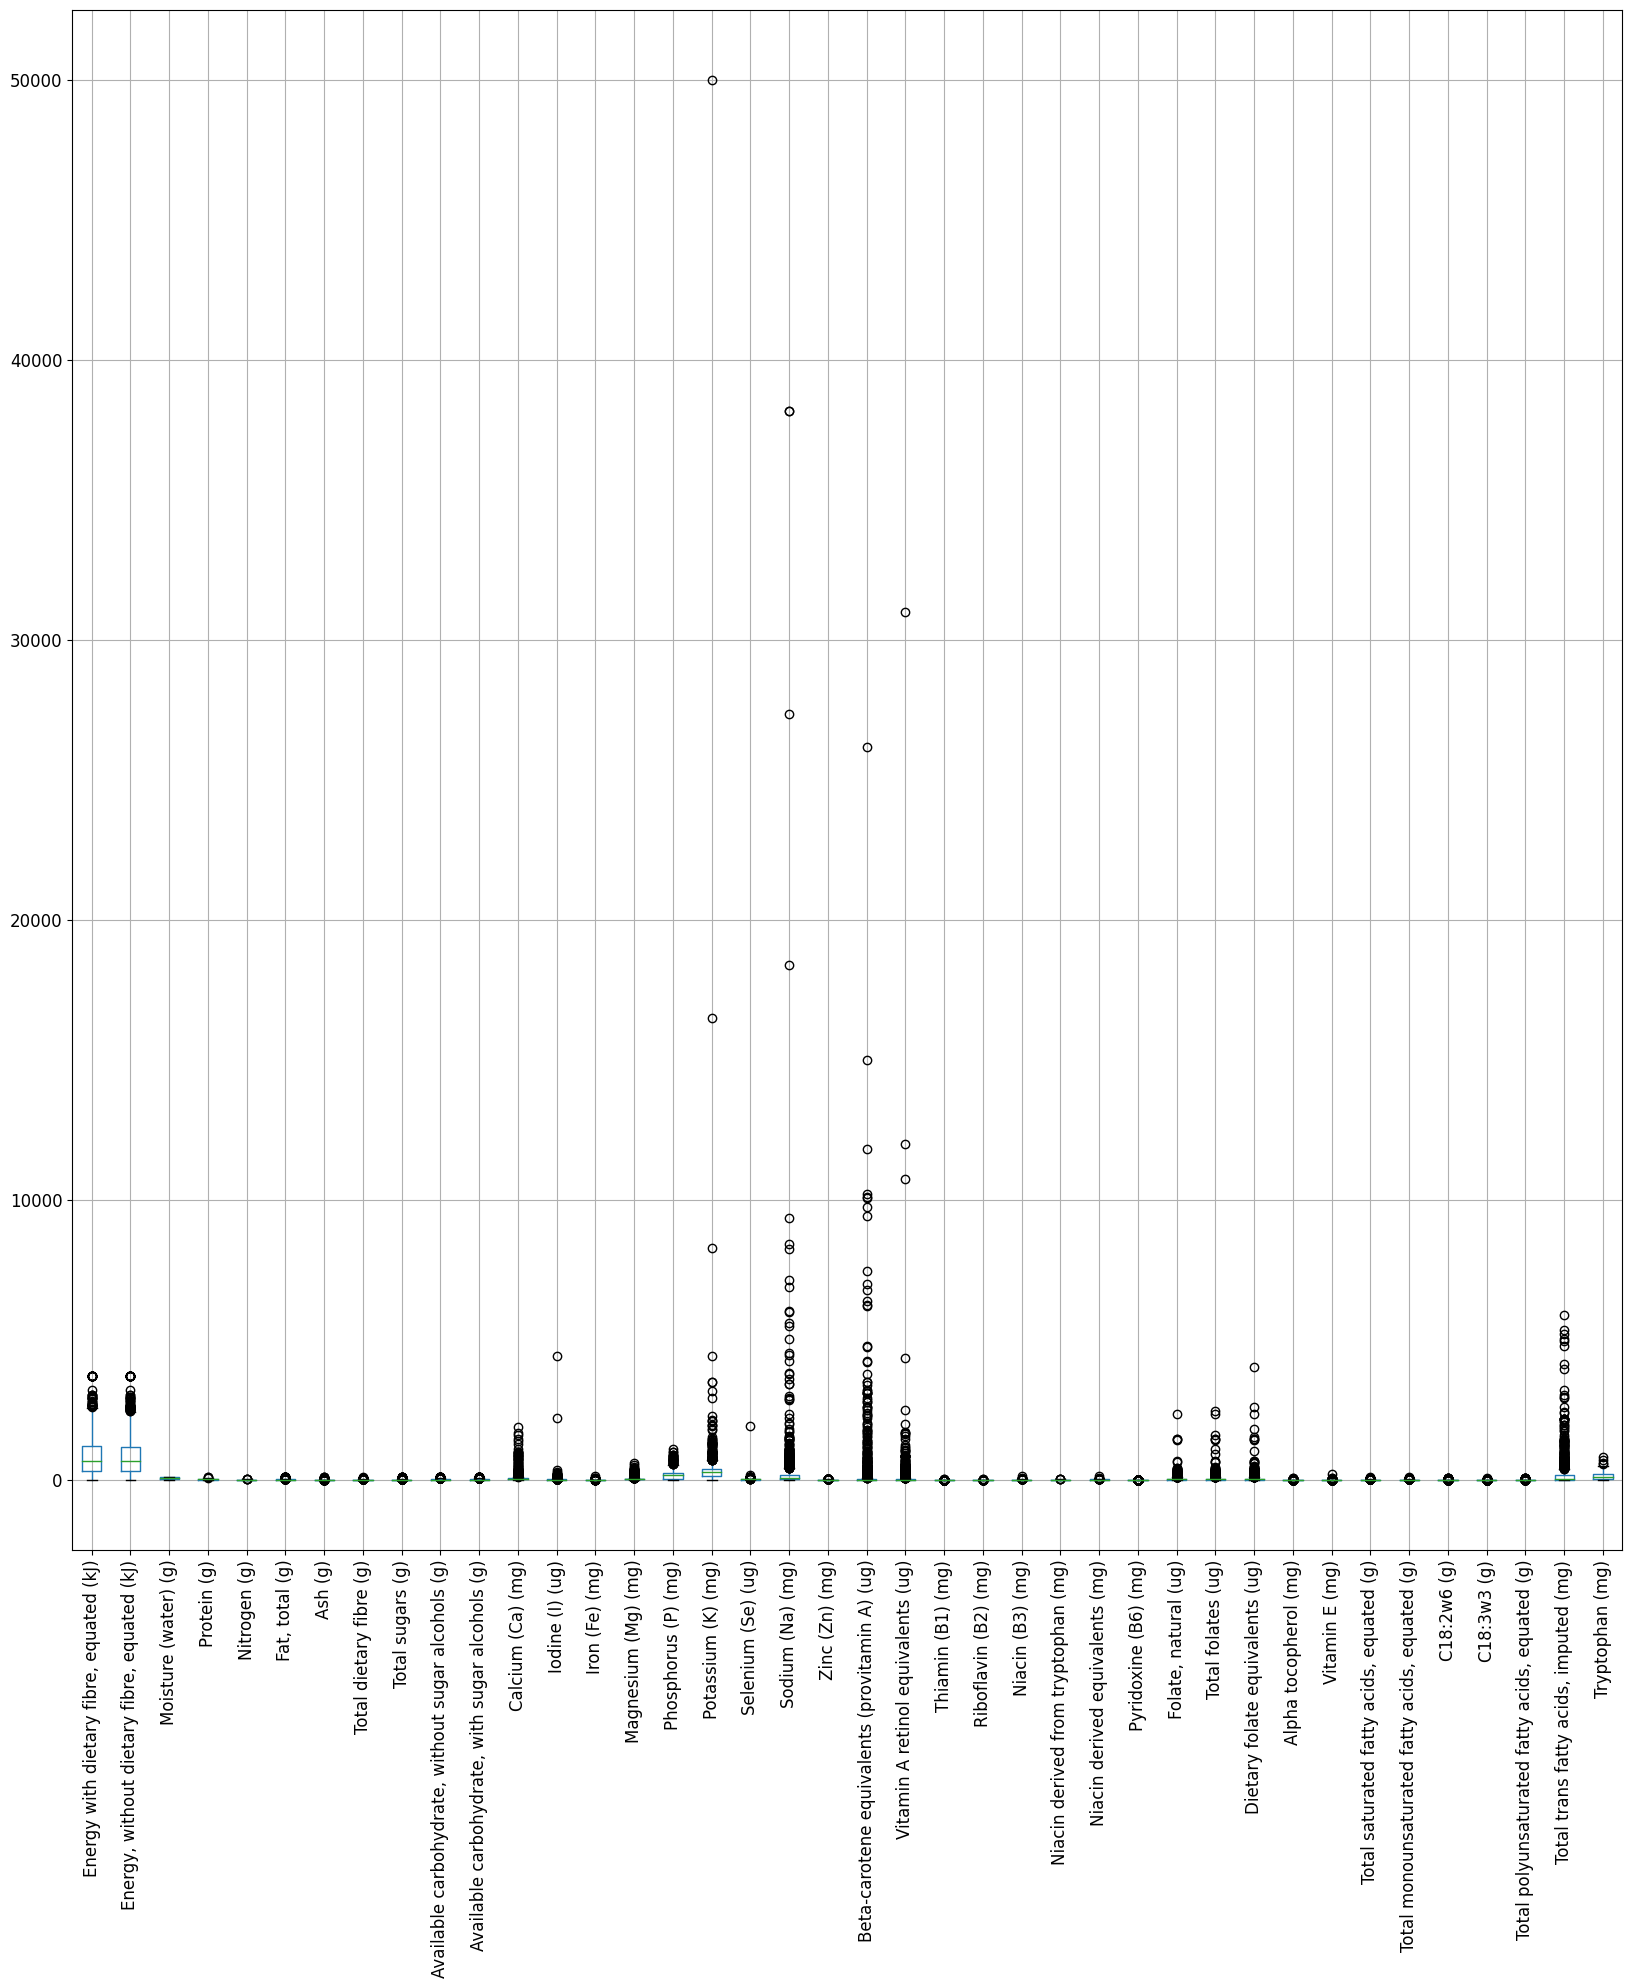

In [121]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 12})

df_numeric_only.boxplot(rot=90)
plt.show()

We can see that the data has significant outliers, that will bias the outcomes of the model. Removing the rows with outlier values.

In [122]:
import pandas as pd
import numpy as np
from scipy import stats

df_outlier_filtered = df_numeric_only[(np.abs(stats.zscore(df_numeric_only)) < 3).all(axis=1)]
df_outlier_filtered.describe()

,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


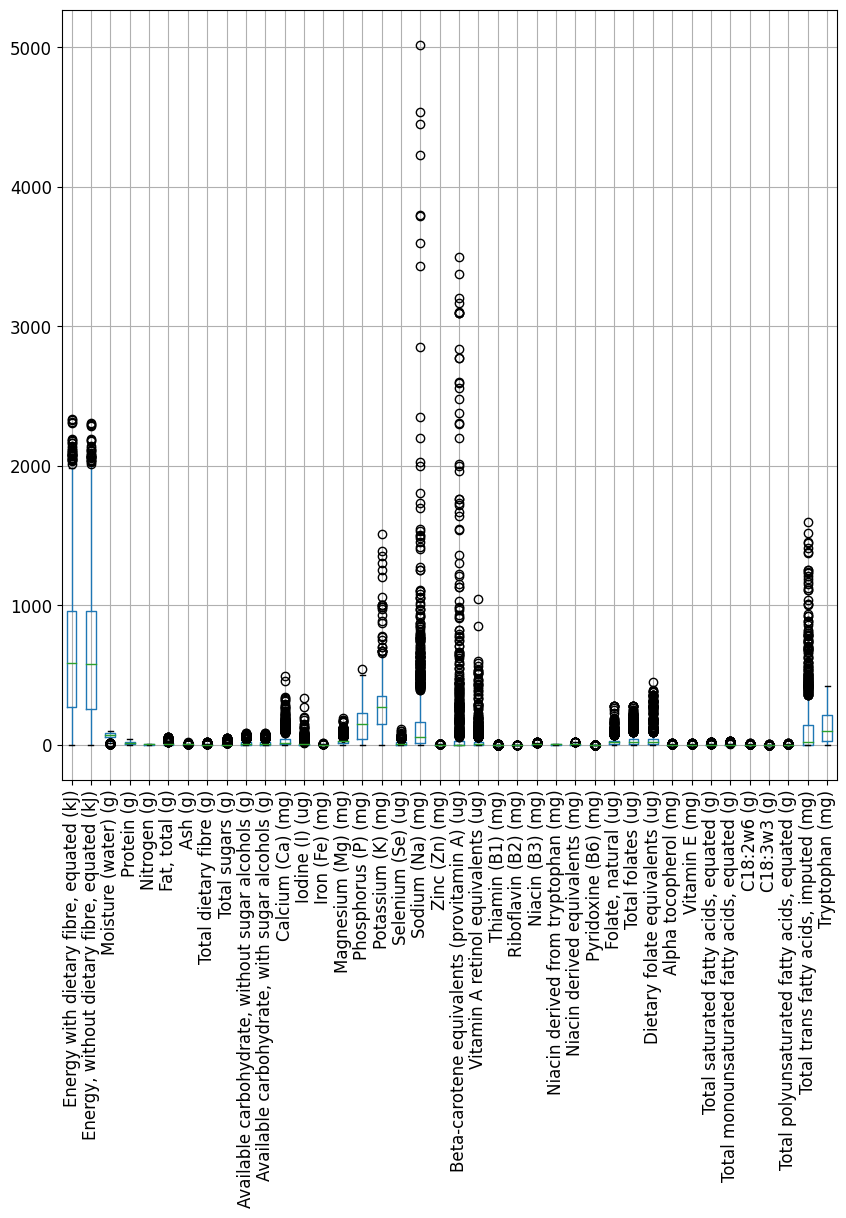

In [146]:
df_outlier_filtered.boxplot(rot=90)
plt.show()

While outliers aren't fully removed, it does not seem feasible to remove values under 3z.
Impute the missing values in the Dataframe with the column mean.

In [124]:
df_imputed = df_outlier_filtered.fillna(df_outlier_filtered.mean())
df_imputed.describe()

,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


Remove any NULL valued rows from the test Dataset (None but for Safety).

In [125]:
test_null_removed = test_column_filtered.dropna()
num_rows_dropped = test_column_filtered.shape[0] - test_null_removed.shape[0]
print(f"{num_rows_dropped} Rows Dropped")
test_null_removed

0 Rows Dropped


,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
1446,571,530,63.1,1.7,0.28,0.2,0.9,5.0,1.3,28.7,...,19,0.2,0.19,0.00,0.00,0.00,0.00,0.00,0.00,21
1423,80,65,93.5,2.4,0.38,0.3,1.7,1.9,0.7,0.7,...,246,0.1,0.14,0.00,0.00,0.00,0.00,0.00,0.00,15
660,108,88,92.1,0.7,0.11,0.2,0.5,2.5,3.8,3.9,...,37,0.2,0.30,0.00,0.00,0.00,0.00,0.00,0.00,9
1529,240,227,81.2,2.3,0.37,0.0,1.0,1.7,1.7,10.7,...,14,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28
202,1565,1528,3.4,8.6,1.38,0.6,2.0,3.2,4.2,80.2,...,577,0.2,0.20,0.10,0.12,0.31,0.01,0.32,2.70,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,78,62,92.5,2.1,0.34,0.2,0.9,2.1,0.8,0.9,...,84,2.5,2.52,0.00,0.00,0.00,0.00,0.00,0.00,39
349,554,543,64.2,3.8,0.61,0.4,0.3,1.4,0.2,27.3,...,14,0.1,0.14,0.06,0.04,0.14,0.02,0.16,0.46,40
1480,842,624,35.3,9.8,1.57,4.5,2.2,27.2,2.4,16.4,...,4,0.1,0.12,1.26,0.36,1.77,0.22,1.99,0.00,102
1463,366,335,78.2,3.6,0.58,1.8,0.6,3.8,5.4,12.5,...,16,0.0,0.00,0.48,0.07,0.27,0.70,0.99,0.00,29


Normalise both Train and Test Data since Linear Regression and Pearson Co-relation are both sensitive to the range of the values.

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(df_imputed.to_numpy())
df_normalised = pd.DataFrame(x, columns=df_imputed.columns)

x = scaler.transform(test_null_removed.to_numpy())
test_normalised = pd.DataFrame(x, columns=test_null_removed.columns)

df_normalised.describe()

,"Energy with dietary fibre, equated (kJ)","Energy, without dietary fibre, equated (kJ)",Moisture (water) (g),Protein (g),Nitrogen (g),"Fat, total (g)",Ash (g),Total dietary fibre (g),Total sugars (g),"Available carbohydrate, without sugar alcohols (g)",...,Dietary folate equivalents (ug),Alpha tocopherol (mg),Vitamin E (mg),"Total saturated fatty acids, equated (g)","Total monounsaturated fatty acids, equated (g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated (g)","Total trans fatty acids, imputed (mg)",Tryptophan (mg)
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,0.295817,0.292873,0.632782,0.289013,0.290191,0.110218,0.080955,0.100220,0.090731,0.165887,...,0.081263,0.062577,0.064619,0.102464,0.089659,0.056382,0.021349,0.069506,0.075136,0.295729
std,0.217344,0.217808,0.251372,0.249829,0.248926,0.156001,0.077326,0.155390,0.175557,0.250856,...,0.142185,0.110131,0.113854,0.163171,0.147171,0.099298,0.045521,0.108440,0.140135,0.255962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116538,0.110533,0.545547,0.050459,0.052933,0.005405,0.043210,0.000000,0.000000,0.000000,...,0.006682,0.009434,0.007547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054762
50%,0.250643,0.251842,0.692308,0.222477,0.230329,0.048649,0.067901,0.022599,0.015385,0.033129,...,0.037862,0.028302,0.033019,0.032491,0.032018,0.018034,0.009852,0.032626,0.010448,0.238095
75%,0.411740,0.414824,0.816802,0.509174,0.510730,0.154955,0.092593,0.152542,0.087912,0.209816,...,0.082405,0.066038,0.070755,0.134928,0.121742,0.065825,0.024631,0.081566,0.088921,0.502381
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


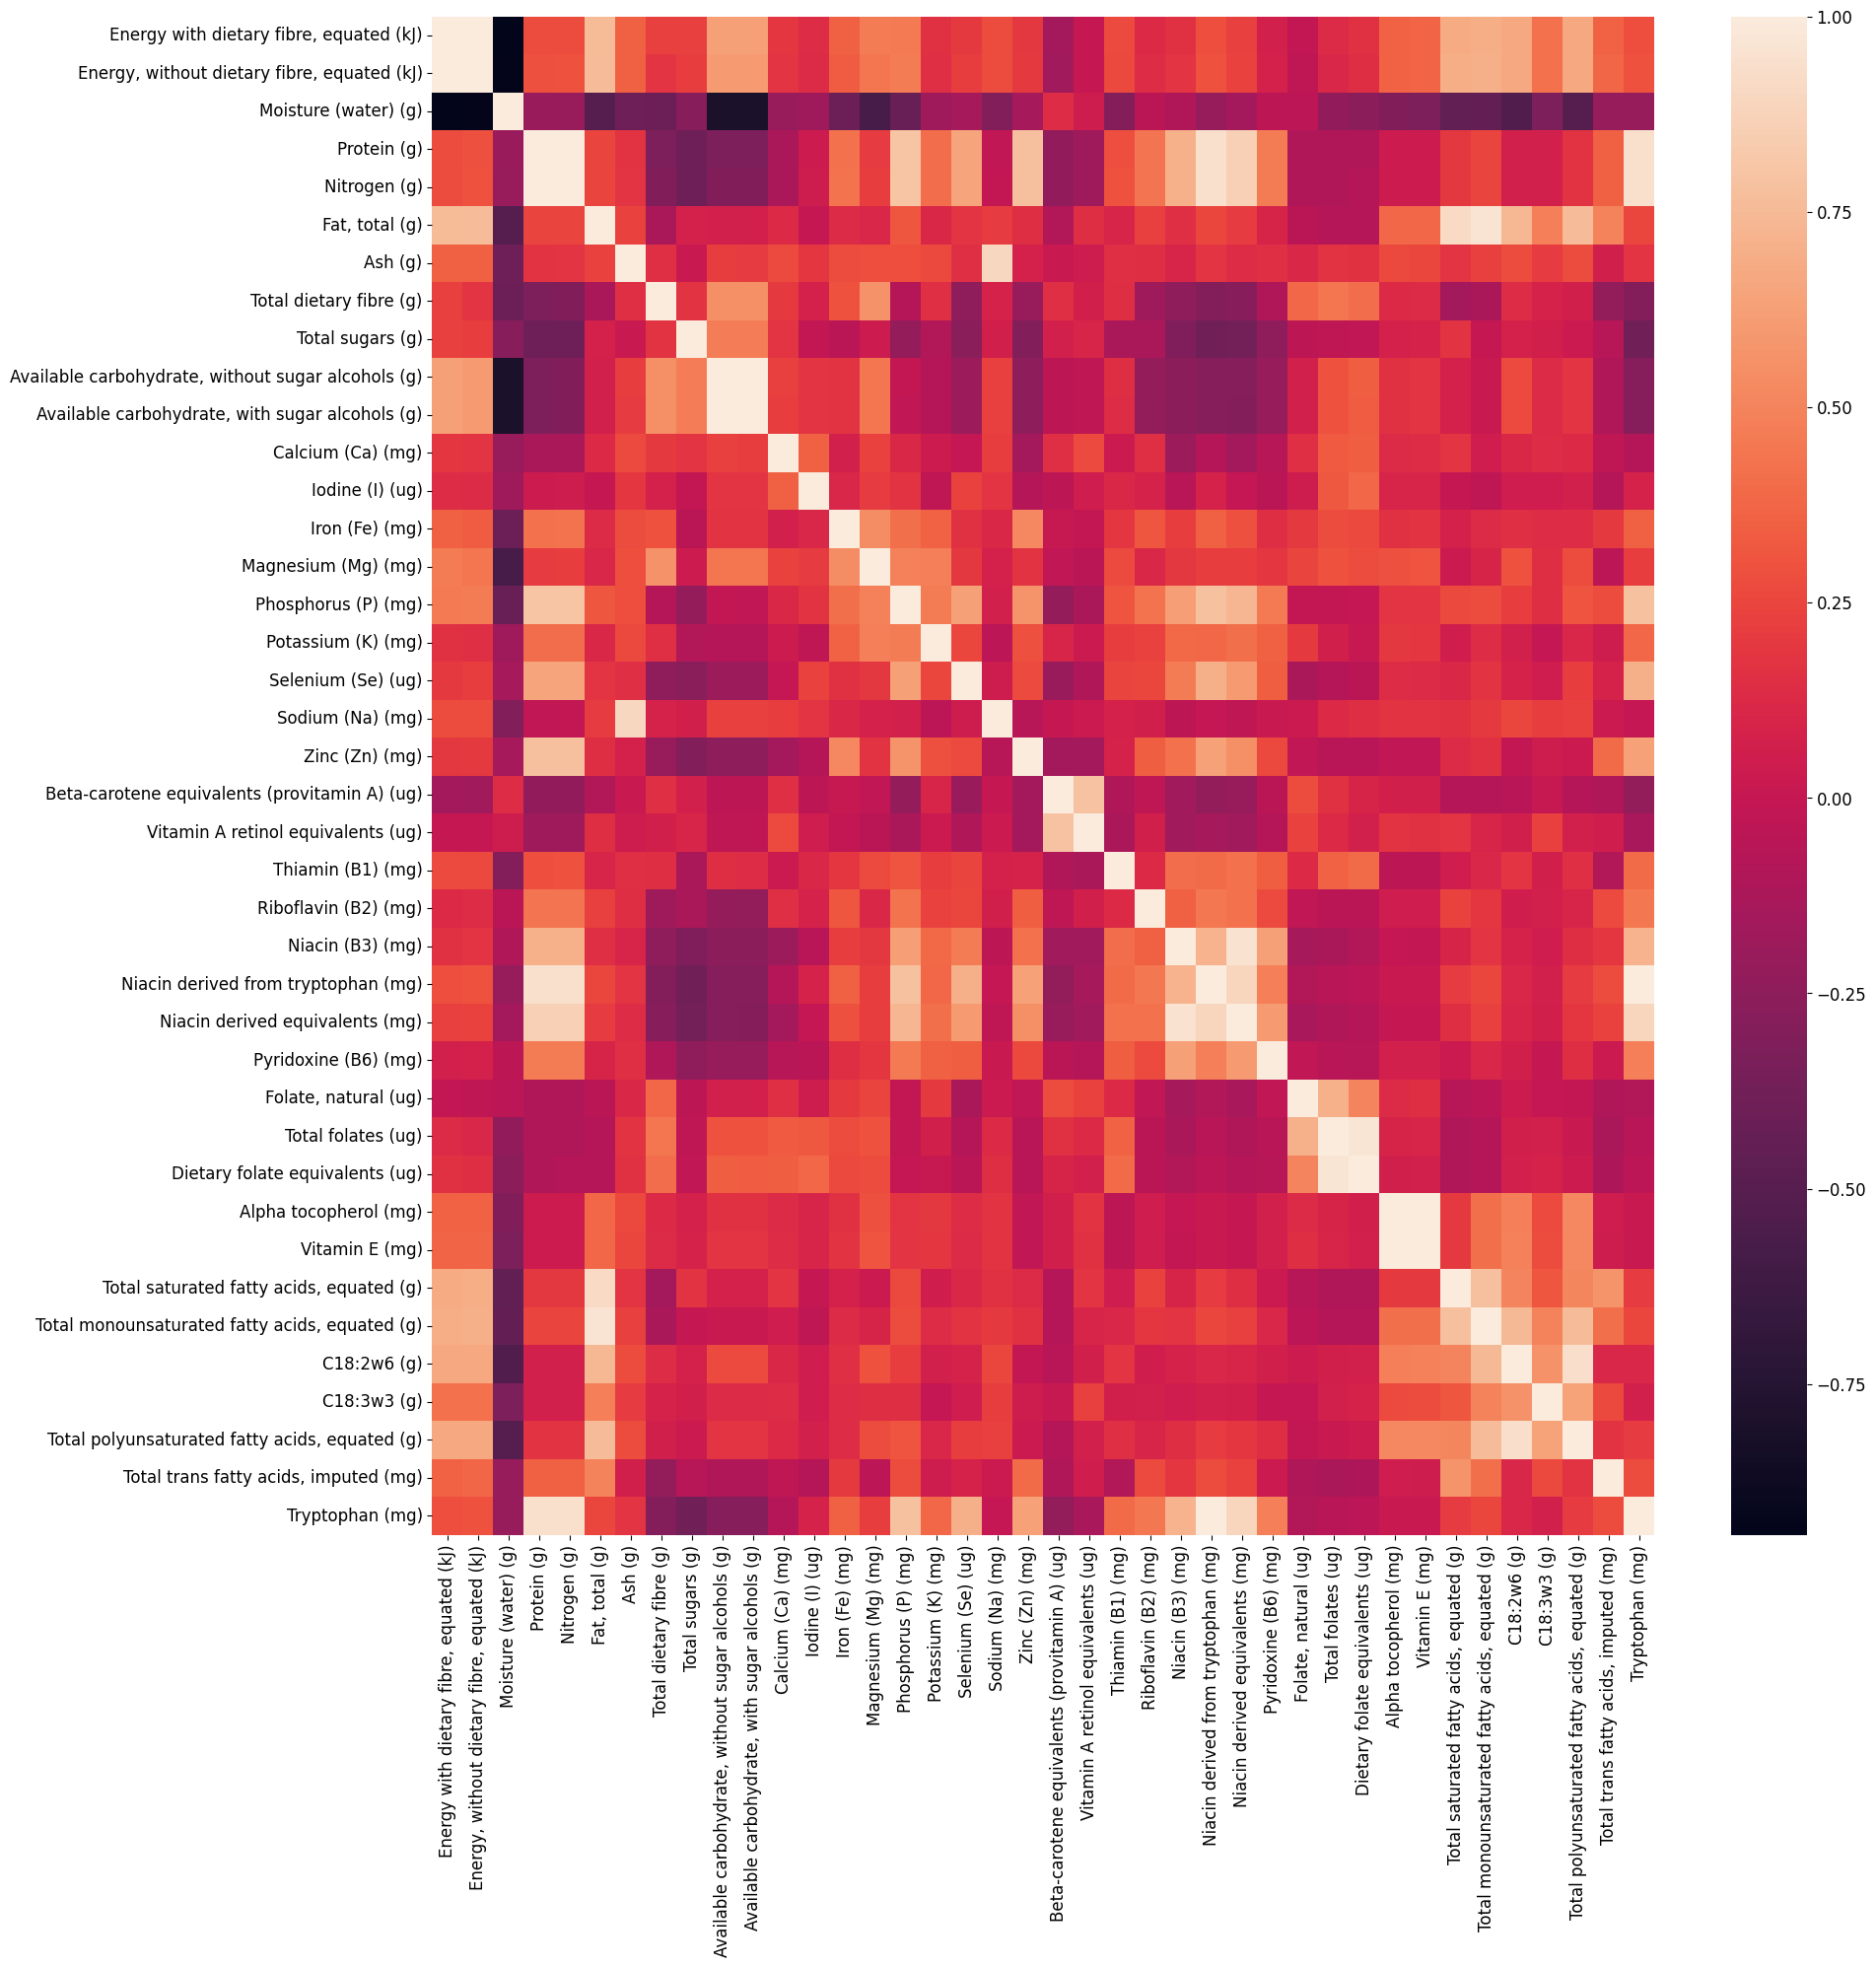

In [127]:
import seaborn as sns
corr_df = df_normalised.corr()
sns.heatmap(corr_df)
corr_df
plt.show()

In [128]:
plt.rcParams.update(plt.rcParamsDefault)

In [129]:
predict_column = 'Energy with dietary fibre, equated (kJ)'
hide_columns = ['Energy, without dietary fibre, equated (kJ)']

In [130]:
y = df_normalised[predict_column]
x = df_normalised[df_normalised.columns.difference([predict_column] + hide_columns)]

y_test = test_normalised[predict_column]
x_test = test_normalised[test_normalised.columns.difference([predict_column] + hide_columns)]

x

,Alpha tocopherol (mg),Ash (g),"Available carbohydrate, with sugar alcohols (g)","Available carbohydrate, without sugar alcohols (g)",Beta-carotene equivalents (provitamin A) (ug),C18:2w6 (g),C18:3w3 (g),Calcium (Ca) (mg),Dietary folate equivalents (ug),"Fat, total (g)",...,Total folates (ug),"Total monounsaturated fatty acids, equated (g)","Total polyunsaturated fatty acids, equated (g)","Total saturated fatty acids, equated (g)",Total sugars (g),"Total trans fatty acids, imputed (mg)",Tryptophan (mg),Vitamin A retinol equivalents (ug),Vitamin E (mg),Zinc (Zn) (mg)
0,0.018868,0.191358,0.914110,0.914110,0.000000,0.005410,0.014778,0.028571,0.055679,0.009009,...,0.089286,0.003351,0.009788,0.008123,0.000000,0.0,0.000000,0.000000,0.023585,0.012453
1,0.000000,0.000000,0.176687,0.176687,0.000000,0.000000,0.000000,0.006122,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.316484,0.0,0.000000,0.000000,0.000000,0.001245
2,0.000000,0.018519,0.154601,0.154601,0.000000,0.000902,0.000000,0.022449,0.000000,0.001802,...,0.000000,0.000745,0.000816,0.000903,0.276923,0.0,0.000000,0.000000,0.000000,0.013699
3,0.000000,0.000000,0.025767,0.025767,0.000000,0.000000,0.000000,0.008163,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004396,0.0,0.007143,0.000000,0.000000,0.000000
4,0.000000,0.006173,0.028221,0.028221,0.000000,0.000000,0.000000,0.008163,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007143,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0.066038,0.037037,0.029448,0.029448,0.102000,0.000000,0.000000,0.051020,0.042316,0.007207,...,0.067857,0.000000,0.000000,0.000000,0.052747,0.0,0.033333,0.057526,0.066038,0.058531
1329,0.056604,0.030864,0.024540,0.024540,0.085143,0.000000,0.000000,0.040816,0.028953,0.007207,...,0.046429,0.000000,0.000000,0.000000,0.043956,0.0,0.028571,0.047939,0.055660,0.046077
1330,0.047170,0.037037,0.013497,0.013497,0.032000,0.000000,0.000000,0.032653,0.037862,0.005405,...,0.060714,0.000000,0.000000,0.000000,0.024176,0.0,0.059524,0.017258,0.049057,0.087173
1331,0.066038,0.049383,0.019632,0.019632,0.038571,0.000000,0.000000,0.046939,0.037862,0.007207,...,0.060714,0.000000,0.000000,0.000000,0.035165,0.0,0.083333,0.021093,0.066038,0.124533


In [131]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit to the train dataset
lm.fit(x, y)

LinearRegression()

In [132]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x)
mse = mean_squared_error(y, y_pred)

print('MSE for the train dataset', mse)

MSE for the train dataset 0.0002202075936639337


In [133]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE for the test dataset', mse)

MSE for the test dataset 0.0028846043713276768


Error is within acceptable bounds, Yay!

Analysing the Most Important Factors in Prediction, and Plotting the received relationships

In [134]:
from matplotlib import pyplot as plt

importance = lm.coef_
# summarize feature importance
importance_df = pd.DataFrame({
    "Column Name": x_test.columns,
    "Importance": importance
})
importance_df

,Column Name,Importance
0,Alpha tocopherol (mg),0.111872
1,Ash (g),-0.097745
2,"Available carbohydrate, with sugar alcohols (g)",-0.053522
3,"Available carbohydrate, without sugar alcohols...",0.127186
4,Beta-carotene equivalents (provitamin A) (ug),0.001996
5,C18:2w6 (g),0.008321
6,C18:3w3 (g),0.000809
7,Calcium (Ca) (mg),0.002430
8,Dietary folate equivalents (ug),2.461023
9,"Fat, total (g)",0.485962


In [135]:
sorted_importance_df = importance_df.sort_values(by='Importance', key=abs)
sorted_importance_df = sorted_importance_df.tail(10)
sorted_importance_df

,Column Name,Importance
3,"Available carbohydrate, without sugar alcohols...",0.127186
18,Nitrogen (g),-0.128867
21,Protein (g),0.187950
9,"Fat, total (g)",0.485962
34,Tryptophan (mg),0.506745
17,Niacin derived from tryptophan (mg),-0.516351
14,Moisture (water) (g),-0.608187
10,"Folate, natural (ug)",1.017846
8,Dietary folate equivalents (ug),2.461023
28,Total folates (ug),-2.549506


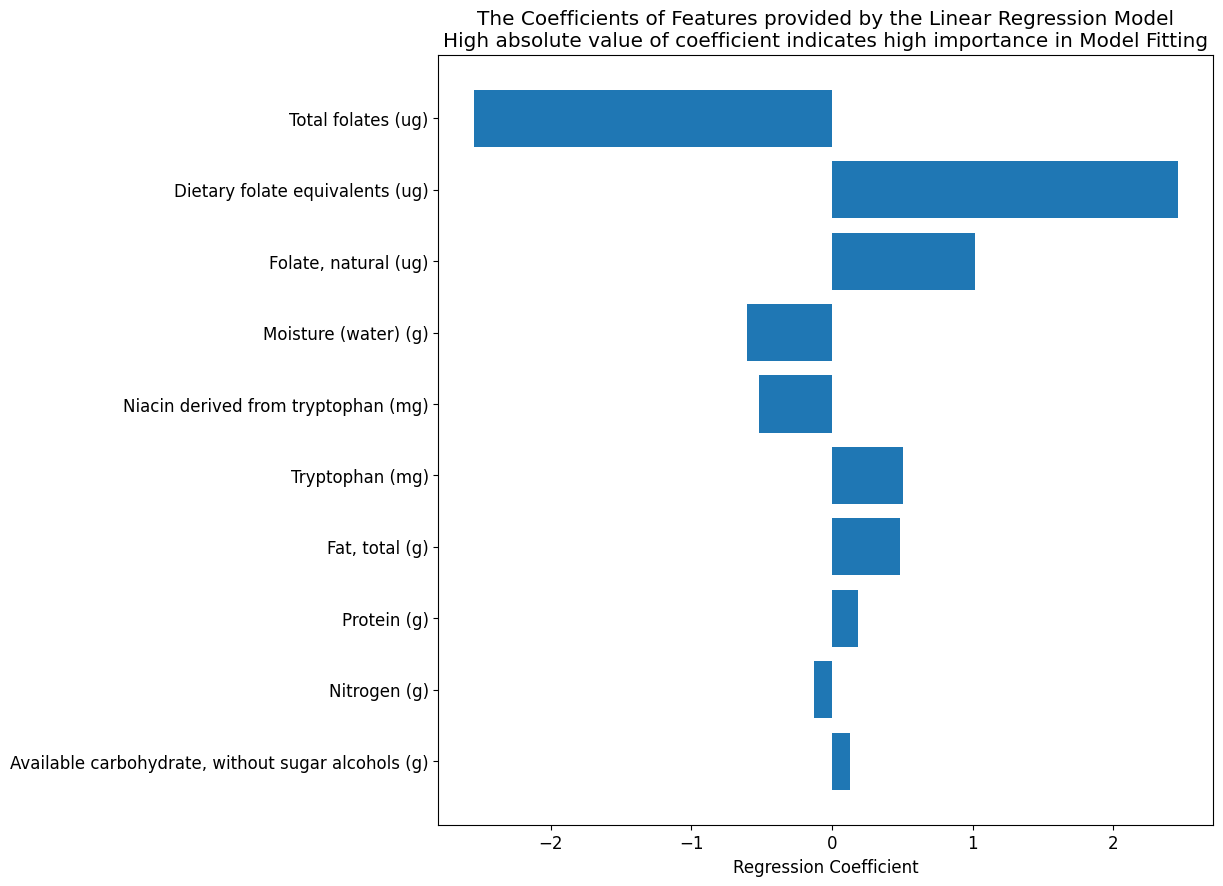

In [147]:
plt.barh(sorted_importance_df["Column Name"], sorted_importance_df["Importance"])
plt.title("The Coefficients of Features provided by the Linear Regression Model\nHigh absolute value of coefficient indicates high importance in Model Fitting")
plt.xlabel("Regression Coefficient")
plt.show()

Plotting the relationship between 4 Most Important Features and the Y column

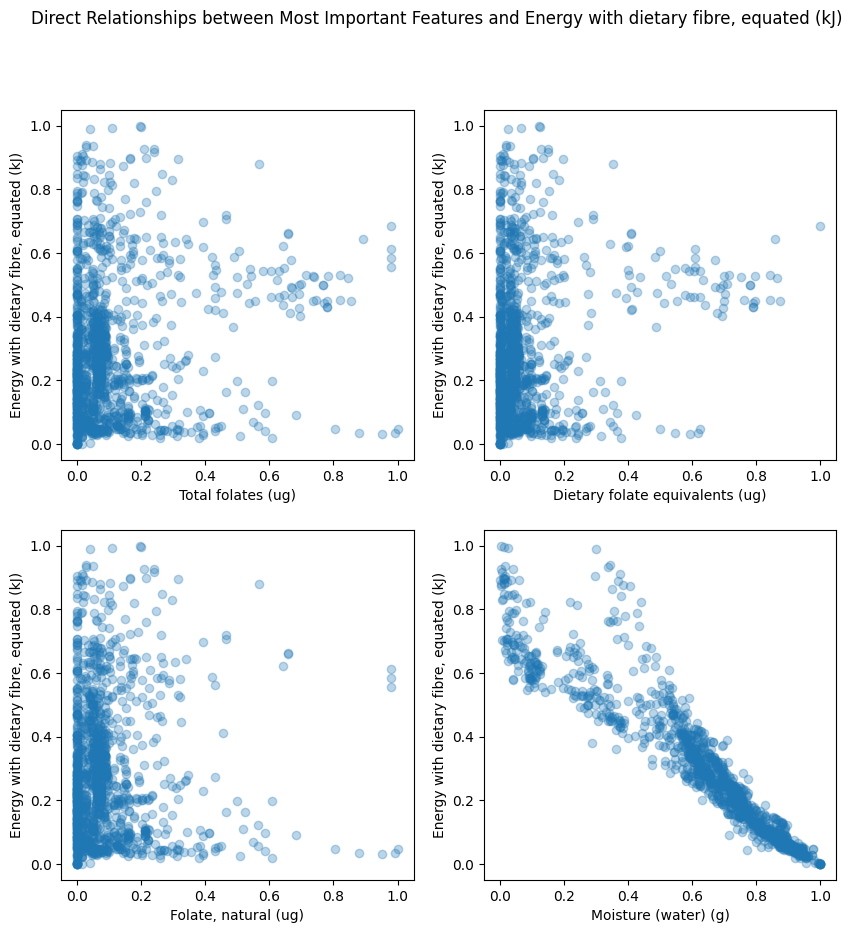

In [137]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle(f'Direct Relationships between Most Important Features and {predict_column}')

for i,ax in enumerate(axs.flat):
    ax.scatter(x[sorted_importance_df["Column Name"].iloc[-i-1]], y, alpha=0.3)
    ax.set_xlabel(sorted_importance_df["Column Name"].iloc[-i-1])
    ax.set_ylabel(predict_column)

plt.show()

Fancy!

## Conclusions

Define a Dataframe with the Critical Columns to perform further analysis on the critical columns to confirm the indicated relationships.

In [138]:
df_critical = df_normalised[['Total folates (ug)','Energy with dietary fibre, equated (kJ)','Moisture (water) (g)']]
df_critical

,Total folates (ug),"Energy with dietary fibre, equated (kJ)",Moisture (water) (g)
0,0.089286,0.570694,0.181174
1,0.000000,0.098972,0.854251
2,0.000000,0.515424,0.520243
3,0.000000,0.074550,0.918016
4,0.000000,0.065124,0.929150
...,...,...,...
1328,0.067857,0.039417,0.925101
1329,0.046429,0.032991,0.937247
1330,0.060714,0.033419,0.940283
1331,0.060714,0.047558,0.914980


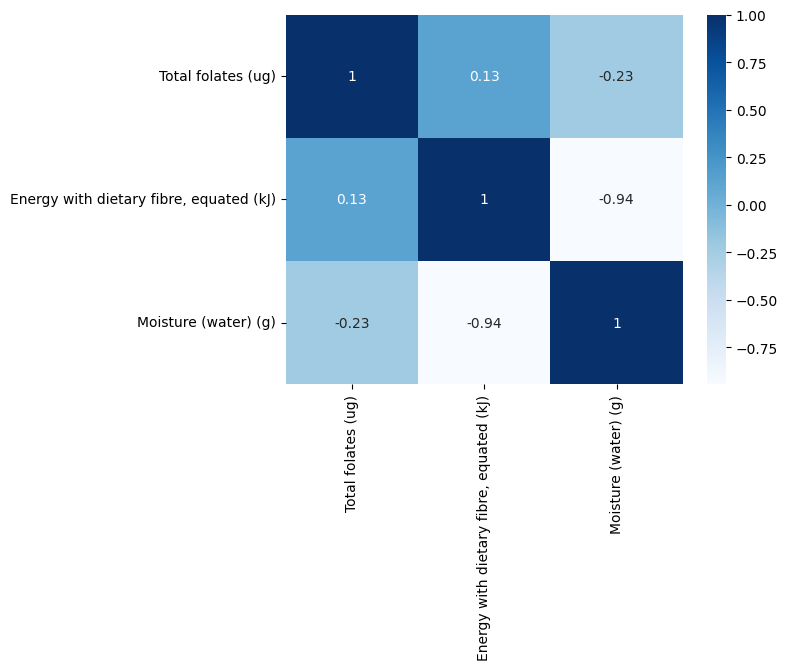

In [139]:
import seaborn as sns
sns.heatmap(df_critical.corr(), cmap="Blues",annot=True)
plt.show()

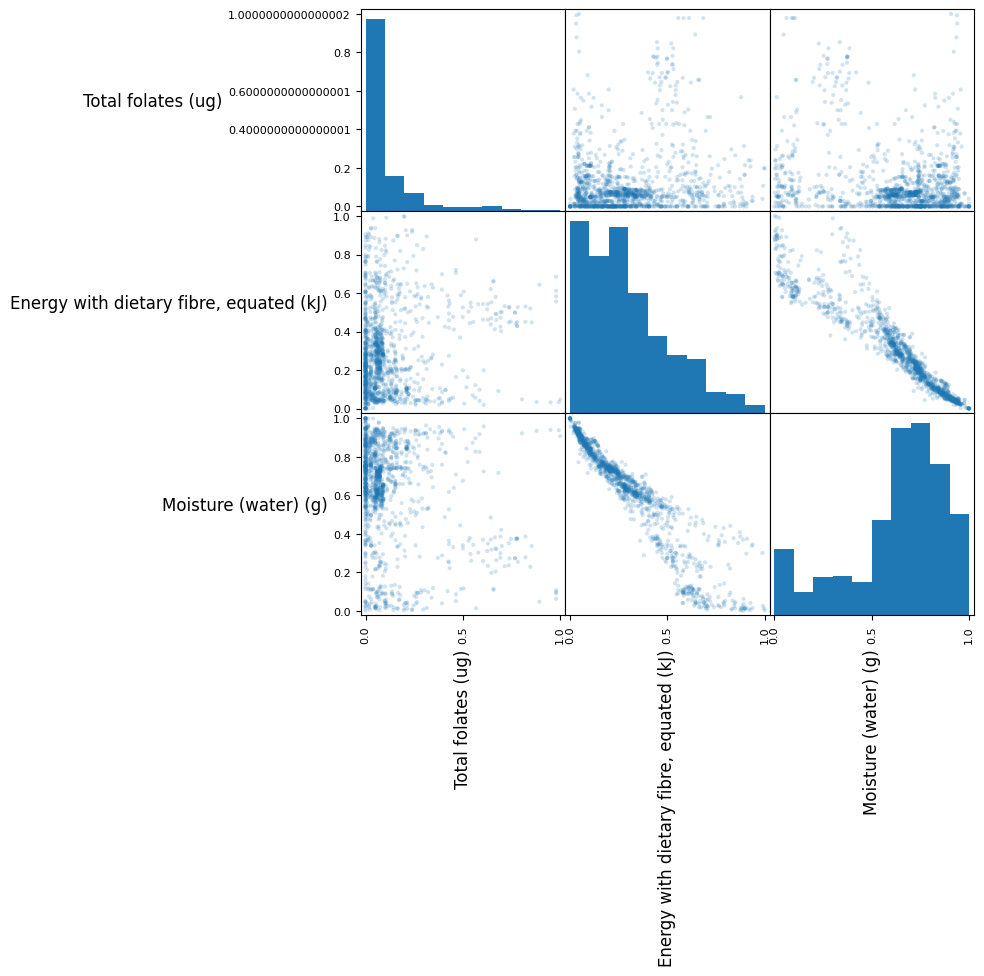

In [148]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 12})

axes = pd.plotting.scatter_matrix(df_critical, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)

3D Scatterplot

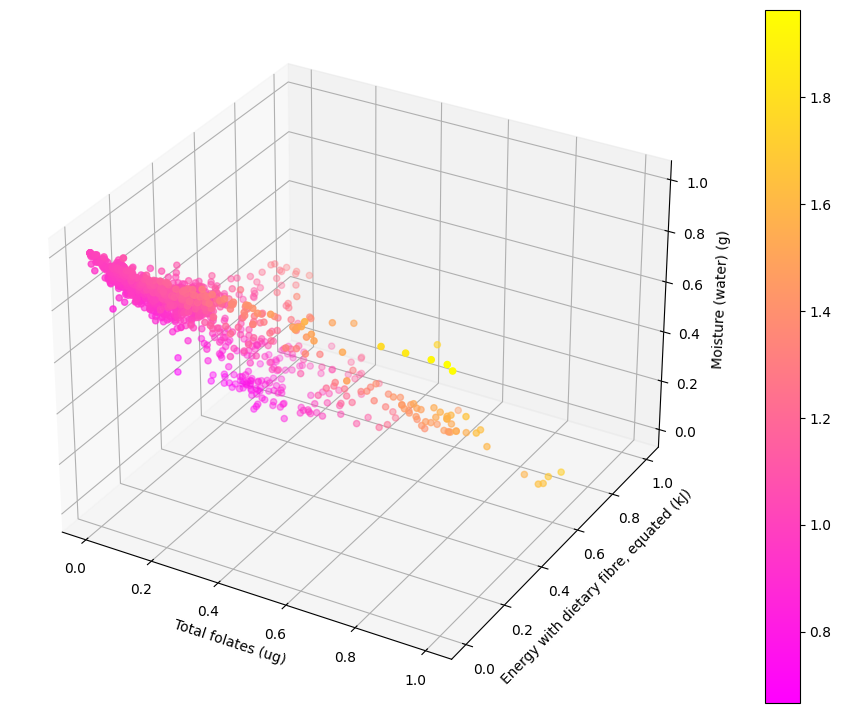

In [155]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = df_critical['Total folates (ug)']
y = df_critical['Energy with dietary fibre, equated (kJ)']
z = df_critical['Moisture (water) (g)']

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.set_xlabel('Total folates (ug)')
ax.set_ylabel('Energy with dietary fibre, equated (kJ)')
ax.set_zlabel('Moisture (water) (g)')

color_map = plt.get_cmap('spring')
scatter_plot = ax.scatter3D(x, y, z, c = (x+y+z), cmap = color_map)

plt.colorbar(scatter_plot)
plt.show()